In [2]:
import histogram_functions as hf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df_imported = pd.read_csv("df.csv", index_col=0)
df_imported = df_imported
df_imported.index = pd.to_datetime(df_imported.index)
df = pd.DataFrame()
df["Microwave"] = df_imported["Microwave"]
df["Default"] = df_imported["Default"]
df["Ground Truth"] = df_imported["Ground Truth"]
df["Microwave - Default (combined)"] = "temporary"
df["Garage door"] = df_imported["Garage door"]

df = df.mask(df == 0.9, 1)
df = df.mask(df == 0.1, 0)

mask1 = (df["Microwave"] == 1.0) & (df["Default"] == 1.0)
mask2 = (df["Microwave"] == 0.0) & (df["Default"] == 1.0)
mask3 = (df["Microwave"] == 0.0) & (df["Default"] == 0.0)
mask4 = (df["Microwave"] == 1.0) & (df["Default"] == 0.0)

df["Microwave - Default (combined)"] = ""
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask1, "11"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask2, "01"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask3, "00"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask4, "10"
)
df.iloc[115:125]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 06:55:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:56:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:57:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:58:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:59:00,0.0,1.0,1.0,01,0.0
2016-01-01 07:00:00,0.0,0.0,0.0,00,0.0
2016-01-01 07:01:00,0.0,0.0,0.0,00,0.0
2016-01-01 07:02:00,0.0,0.0,0.0,00,0.0
2016-01-01 07:03:00,0.0,0.0,0.0,00,0.0
2016-01-01 07:04:00,0.0,0.0,0.0,00,0.0


In [78]:
df.iloc[100:110, :]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 06:40:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:41:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:42:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:43:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:44:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:45:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:46:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:47:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:48:00,0.0,1.0,1.0,01,0.0
2016-01-01 06:49:00,0.0,1.0,1.0,01,0.0


In [126]:
df.head()

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 05:00:00,0.0,1.0,1.0,01,0.0
2016-01-01 05:01:00,0.0,1.0,1.0,01,0.0
2016-01-01 05:02:00,0.0,1.0,1.0,01,0.0
2016-01-01 05:03:00,0.0,1.0,1.0,01,0.0
2016-01-01 05:04:00,0.0,1.0,1.0,01,0.0


In [128]:
df.iloc[122:124,:]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 07:02:00,0.0,0.0,0.0,00,0.0
2016-01-01 07:03:00,0.0,0.0,0.0,00,0.0


In [151]:
df = df.iloc[:10080, :]

In [6]:
o = ["00", "01", "10", "11"]
o_states = np.full((4, 1), "place holder", dtype=object)
o_states = o
print(o_states)

['00', '01', '10', '11']


In [156]:
def observable_observable(data_frame, steps, o_states, observations_col_idx):
    st = [None] * (steps + 1)
    res = np.full((len(o_states),) * (steps + 1), True, dtype=object)
    num = np.full((len(o_states),) * (steps + 1), 0, dtype=int)

    for s in range(len(st)):
        st[s] = np.full((len(o_states),) * (len(st) - s), "place holder", dtype=object)
    st[-1] = st[-1][np.newaxis, :]

    for i in range(len(data_frame) - steps):
        for idx, s in enumerate(np.arange(i, i + (steps + 1))):
            temp_list = list(zip(o_states, st[idx]))

            if idx == (len(st) - 1):
                st[idx] = np.tile(data_frame.iloc[s, observations_col_idx], len(o_states)) == o_states
                st[idx] = st[idx][np.newaxis, :]

                for a2 in range(0, len(st), 1):
                    res = res & st[a2]

            else:
                for k in range(len(o_states)):
                    temp_list[k][1][:] = (
                        np.tile(data_frame.iloc[s, observations_col_idx], len(o_states)) == o_states
                    )[k]

        num = num + res.astype(int)
        res[:] = True
    return num

In [154]:
def hidden_observable(
    data_frame, steps, h_states, o_states, hidden_col_idx, observations_col_idx
):
    st = [None] * (steps + 1)
    res = np.full((len(h_states),) * (steps + 1), True, dtype=object)
    num = np.full((len(h_states),) * (steps + 1) + (len(o_states),), 0, dtype=int)
    obs = np.full(
        (len(h_states),) * (steps + 1) + (len(o_states),), "place holder", dtype=object
    )
    observations = np.full((1, len(o_states)), "place holder", dtype=object)

    for s in range(len(st)):
        st[s] = np.full((len(h_states),) * (len(st) - s), "place holder", dtype=object)
    st[-1] = st[-1][np.newaxis, :]

    for i in range(len(data_frame) - steps):
        for idx, s in enumerate(np.arange(i, i + (steps + 1))):
            temp_list = list(zip(h_states, st[idx]))

            if idx == (len(st) - 1):
                st[idx] = (
                    np.tile(data_frame.iloc[s, hidden_col_idx], len(h_states))
                    == h_states
                )
                st[idx] = st[idx][np.newaxis, :]

                for a2 in range(0, len(st), 1):
                    res = res & st[a2]

                observations = (
                    np.tile(data_frame.iloc[s, observations_col_idx], len(o_states))
                    == o_states
                )
            
                obs = np.tile(res.reshape(res.shape + (1,)), len(o_states))
                obs = obs & observations
               

            else:
                for k in range(len(h_states)):
                    temp_list[k][1][:] = (
                        np.tile(data_frame.iloc[s, hidden_col_idx], len(h_states))
                        == h_states
                    )[k]

        
        num = num + obs.astype(int)
        res[:] = True
        obs[:] = "place holder"
    return num

In [153]:
h_states = [0, 1]
hidden_observable(data_frame = df, steps=1, h_states=h_states, o_states=o_states,  hidden_col_idx=2, observations_col_idx=3)

10078


array([[[3327,    0,   19,    0],
        [   7,    7,    0,    0]],

       [[  14,    0,    0,    0],
        [1253, 5384,    0,   68]]])

In [107]:
def hidden_hidden(data_frame, steps, h_states, hidden_col_idx):
    st = [None] * (steps + 1)
    res = np.full((len(h_states),) * (steps + 1), True, dtype=object)
    num = np.full((len(h_states),) * (steps + 1), 0, dtype=int)

    for s in range(len(st)):
        st[s] = np.full((len(h_states),) * (len(st) - s), "place holder", dtype=object)
    st[-1] = st[-1][np.newaxis, :]

    for i in range(len(data_frame) - steps):
        for idx, s in enumerate(np.arange(i, i + (steps + 1))):
            temp_list = list(zip(h_states, st[idx]))

            if idx == (len(st) - 1):
                st[idx] = (
                    np.tile(data_frame.iloc[s, hidden_col_idx], len(h_states))== h_states
                )
                st[idx] = st[idx][np.newaxis, :]

                for a2 in range(0, len(st), 1):
                    res = res & st[a2]

            else:
                for k in range(len(h_states)):
                    temp_list[k][1][:] = (
                        np.tile(data_frame.iloc[s, hidden_col_idx], len(h_states))
                        == h_states
                    )[k]

        num = num + res.astype(int)
        res[:] = True
    return num

In [155]:
h_states = [0,1]
hidden_hidden(data_frame=df, steps=2, h_states=h_states, hidden_col_idx=2)

array([[[3332,   14],
        [   0,   14]],

       [[  14,    0],
        [  14, 6690]]])

In [202]:
testing_matrix = observable_observable(data_frame=df, steps=3, o_states=o_states, observations_col_idx=3)

In [203]:
print(testing_matrix)

[[[[4550    7   10    0]
   [   0    7    0    0]
   [   6    0    4    0]
   [   0    0    0    0]]

  [[   0    0    0    0]
   [   0    7    0    0]
   [   0    0    0    0]
   [   0    0    0    0]]

  [[   6    0    0    0]
   [   0    0    0    0]
   [   2    0    2    0]
   [   0    0    0    0]]

  [[   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]]]


 [[[   7    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]]

  [[   7    0    0    0]
   [   7 5285    0   27]
   [   0    0    0    0]
   [   0    7    0   20]]

  [[   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]]

  [[   0    0    0    0]
   [   0    7    0    0]
   [   0    0    0    0]
   [   0   14    0    8]]]


 [[[  10    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]]

  [[   0    0    0    0]
   [   0    0    0    0]
   [   0    0    0    0]
   

In [206]:
def plot_histogram(matrix, states):
    x_dim = np.product(matrix.shape[0])
    y_dim = np.product(matrix.shape[1:-1])
    print(matrix.shape)

    while y_dim >= 5 * x_dim:
        i = 2
        x_dim = np.product(matrix.shape[:i])
        y_dim = np.product(matrix.shape[(i + 1) : -1])
        i = i + 1
    print(x_dim, y_dim)

    fig, axs = plt.subplots(x_dim, y_dim, figsize=(x_dim * 5, y_dim * 2))

    matrix = matrix.reshape(x_dim, y_dim, matrix.shape[-1])

    for i in range(x_dim):
        for j in range(y_dim):
            axs[i, j].bar(states, matrix[i, j, :])
            
       

    plt.tight_layout()
    plt.show()

(4, 4, 4, 4)
4 16


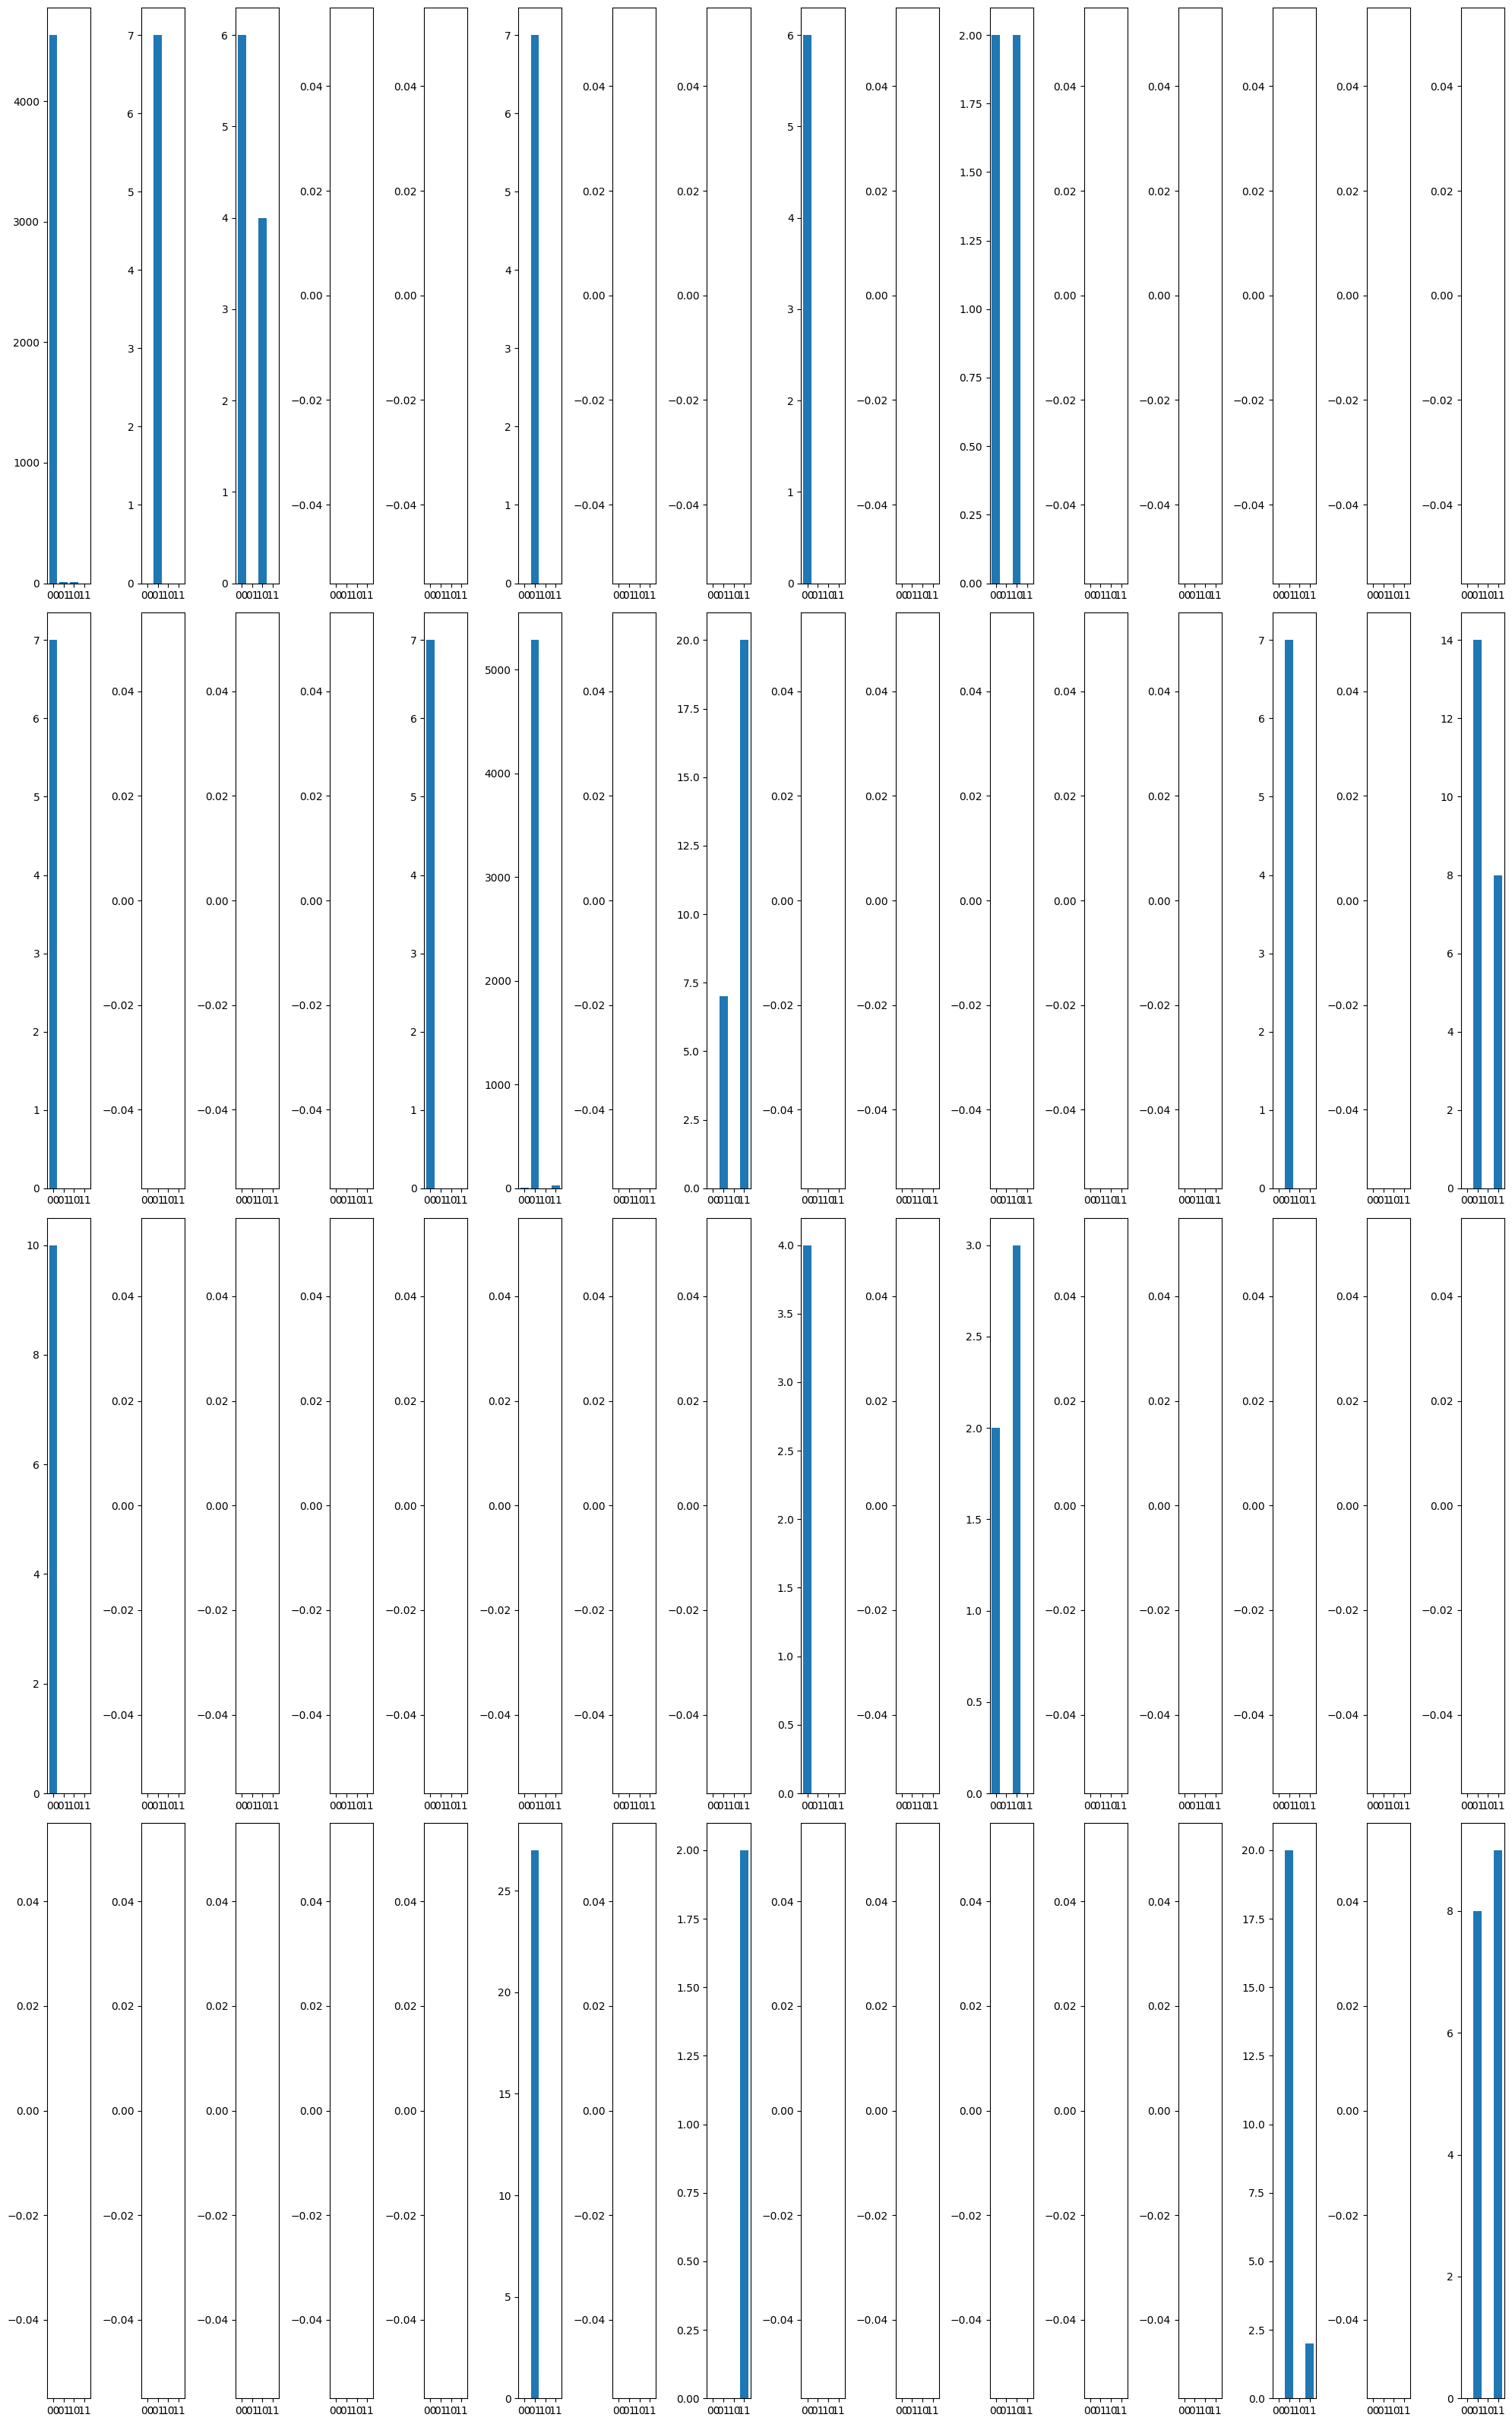

In [207]:
plot_histogram(testing_matrix, o_states)

In [ ]:

t = ['01']*4
t = np.array(t)
print(o_states)
print(o_states == t)

['00', '01', '10', '11']
[False  True False False]


In [ ]:
descending_range = range(9, -1, -1)

# Convert the range to a list if needed
descending_list = list(descending_range)

# Print the result
print(descending_list)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [ ]:
st = np.full((4, 4, 4), "place holder", dtype=object)
mt = np.full((4, 4), "place holder", dtype=object)
bt = np.full((4), "place holder", dtype=object)

k = list(zip(o_states, st))
m = list(zip(o_states, mt))
b = list(zip(o_states, bt))


for a in range(len(st)):
    k[a][1][:] = np.tile(df.iloc[0, 3], len(o_states)) == o_states[a]
    m[a][1][:] = np.tile(df.iloc[1, 3], len(o_states)) == o_states


b = np.tile("11", len(o_states)) == o_states

print(type(m))
k = np.array(k, dtype=object)
m = np.array(m, dtype=object)

result_matrix = np.array([t[1].tolist() for t in m])

# Print the result
print(result_matrix)
print(result_matrix.T)

<class 'list'>
[[False  True False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]]
[[False False False False]
 [ True  True  True  True]
 [False False False False]
 [False False False False]]


In [ ]:
print(np.arange(4,9))

[4 5 6 7 8]


In [ ]:
t = np.zeros([3,3])
print(t[0].shape)

(3,)


In [ ]:
kt = np.full((4, 4, 4), "place holder", dtype=object)
k = list(zip(o_states, kt))

for a in range(len(kt)):
    k[a][1][:] = np.tile(df.iloc[0, 3], len(o_states)) == o_states[a]

print(kt)
print(kt.T)

[[[False False False False]
  [False False False False]
  [False False False False]
  [False False False False]]

 [[True True True True]
  [True True True True]
  [True True True True]
  [True True True True]]

 [[False False False False]
  [False False False False]
  [False False False False]
  [False False False False]]

 [[False False False False]
  [False False False False]
  [False False False False]
  [False False False False]]]
[[[False True False False]
  [False True False False]
  [False True False False]
  [False True False False]]

 [[False True False False]
  [False True False False]
  [False True False False]
  [False True False False]]

 [[False True False False]
  [False True False False]
  [False True False False]
  [False True False False]]

 [[False True False False]
  [False True False False]
  [False True False False]
  [False True False False]]]


In [ ]:
# Array with shape (4,)
a = np.array([1, 2, 3, 4])

# Array with shape (4, 3)
b = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])

# Add the arrays using broadcasting
result = a[:, np.newaxis] + b

print("Array a:")
print(a)
print("\nArray b:")
print(b)
print("\nResult after broadcasting:")
print(result)

Array a:
[1 2 3 4]

Array b:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Result after broadcasting:
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [24]:
import numpy as np

steps = 1
obs = np.full((len(h_states),) * (steps + 1), 0, dtype=int)
res = np.full((len(h_states),) * (steps + 1) + (4,), 0, dtype=int)
a = np.full((1, 4), 0, dtype=int)
print(obs.shape)
print(res.shape)

print(a[np.newaxis, :].shape)
res = obs & a[np.newaxis, :]
print(res)

(2, 2)
(2, 2, 4)
(1, 1, 4)


ValueError: operands could not be broadcast together with shapes (2,2) (1,1,4) 

In [49]:
import numpy as np

# Your original (2,2) matrix
original_matrix = np.array([[1, 2], [3, 4]])
print(original_matrix[:, :, np.newaxis])

# Replicate each element 4 times
result_matrix = np.tile(original_matrix[:, np.newaxis], 4)

print(result_matrix)

[[[1]
  [2]]

 [[3]
  [4]]]
[[[1 2 1 2 1 2 1 2]]

 [[3 4 3 4 3 4 3 4]]]


In [44]:
import numpy as np

A = np.array([[True, False], [False, True]])  # Replace this with your (2, 2) matrix
B = np.array([[False, True]])  # Replace this with your (1, 4) matrix
result = np.zeros((2, 2))
# Reshape B to (1, 4, 1) to match the shape of A
B_reshaped = B.reshape(1, B.shape[1], 1)

print(B_reshaped.shape)
print(A[:, np.newaxis].shape)

# Perform the bitwise AND operation using broadcasting
A = np.tile(B.T, (1, 2))

print(np.tile(B.T, (1, 2)))

(1, 2, 1)
(2, 1, 2)
[[False False]
 [ True  True]]


In [56]:
import numpy as np


def replicate_elements(matrix, repetitions):
    shape = matrix.shape
    new_shape = shape + (repetitions,)
    print(np.tile(matrix.reshape(shape + (1,)), repetitions))
    return np.tile(matrix.reshape(shape + (1,)), repetitions).reshape(new_shape)


# Example usage
original_matrix = np.array([[1, 2], [3, 4]])
result_matrix = replicate_elements(original_matrix, 6)

print(result_matrix)

[[[1 1 1 1 1 1]
  [2 2 2 2 2 2]]

 [[3 3 3 3 3 3]
  [4 4 4 4 4 4]]]
[[[1 1 1 1 1 1]
  [2 2 2 2 2 2]]

 [[3 3 3 3 3 3]
  [4 4 4 4 4 4]]]
